In [1]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

###### Load Dataset

In [2]:
df = pandas.read_csv('stroke-data.csv')

###### Visualization of data

In [3]:
df.head(10) # get dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
df.info() # get more info on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Data analysis

stroke
0    43.0
1    71.0
Name: age, dtype: float64


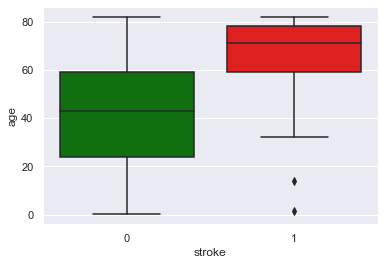

In [5]:
#boxplot , age vs stroke. This box plot shows the age distribution between people who got strokes and who didnt.
ax = sns.boxplot(x="stroke", y="age", data=df,palette=["green","red"])

#finding median age for people who got stroke and for others who hasn't
medians = df.groupby(['stroke'])['age'].median()
print(medians)

stroke
0     91.47
1    105.22
Name: avg_glucose_level, dtype: float64


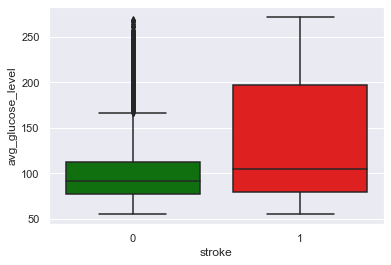

In [6]:
#boxplot , age vs gloucose_level. This box plot shows the glucose_level distribution between people who got strokes and who didnt.
ax = sns.boxplot(x="stroke", y="avg_glucose_level", data=df,palette=["green","red"])

#finding median BMI for people who got stroke and for others who hasn't
medians = df.groupby(['stroke'])['avg_glucose_level'].median()
print(medians)

C:\ProgramData\Anaconda3.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

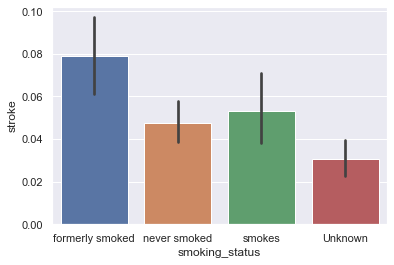

In [7]:
#shows relationships between smoking and strokes.
sns.set_theme(style="darkgrid")
sns.barplot(df['smoking_status'],df['stroke'])

In [8]:
# sns.set_theme(style="whitegrid")

# plt.figure(figsize=(20,15))

# plt.subplot(2,3,1)
# sns.boxenplot(x=df['stroke'], y=df['age'],
#               color="green", 
#               scale="linear", data=df)

# plt.subplot(2,3,2)
# sns.boxenplot(x=df['stroke'], y=df['bmi'],
#               color="b", 
#               scale="linear", data=df)

# plt.subplot(2,3,3)
# sns.boxenplot(x=df['stroke'], y=df['avg_glucose_level'],
#               color="pink", 
#               scale="linear", data=df)

# Pre-processing

###### Duplicate values

In [9]:
df.duplicated().sum()

0

###### Missing Values

In [10]:
#finding null values in the dataset
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

###### Replacing the null BMI values to average BMI according to male, female and other. Here I am using the impute missing values method, so data is preserved.

In [11]:
#Getting the mean BMI for male, female and other
maleBMI = np.mean(df[df['gender'] == 'Female']['bmi'])
femaleBMI = np.mean(df[df['gender'] == 'Male']['bmi'])
otherBMI = np.mean(df['bmi'])

In [12]:
#filling all NaN values with 0
df['bmi'] = df['bmi'].fillna(0)

In [13]:
#looping through the dataset and replacing all 0 values with new mean BMI values.
#impute method
for i in range(0,5035):
    if(df['bmi'][i] == 0):
        
        if(df['gender'][i] == 'Male'):
            df['bmi'][i] = maleBMI
        
        elif(df['gender'][i] == 'Female'):
            df['bmi'][i] = femaleBMI
            
        else:
            df['bmi'][i] = otherBMI
            

C:\Users\Tushar\AppData\Local\Temp/ipykernel_8400/2067426469.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'][i] = femaleBMI
C:\Users\Tushar\AppData\Local\Temp/ipykernel_8400/2067426469.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'][i] = maleBMI


In [14]:
#Double checking if the NaN values are replaced with avergae BMIs
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

###### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [16]:
#transform ever_married status to 1: married, and 0: Not married
df['ever_married']= LE.fit_transform(df['ever_married'])
df['ever_married'].unique()

array([1, 0])

In [17]:
#transform Residence type to 1: Urban, and 0 : Rural
df['Residence_type']= LE.fit_transform(df['Residence_type'])
df['ever_married'].unique()

array([1, 0])

In [18]:
#label encoding marriage status 
#ever_married = {'No': 0, 'Yes': 1}
#print(df['ever_married'])
#df['ever_married'] = df['ever_married'].map(ever_married)
#print(df['ever_married'])

In [19]:
#label encoding residence type
#Residence_type= {'Rural': 0, 'Urban': 1}
#print(df['Residence_type'])
#df['Residence_type'] = df['Residence_type'].map(Residence_type)
#print(df['Residence_type'])

###### One Hot Encoder

In [20]:
from sklearn.preprocessing import OneHotEncoder #,StandardScaler, LabelEncoder
OHC = OneHotEncoder(dtype=np.int)

C:\Users\Tushar\AppData\Local\Temp/ipykernel_8400/4208832817.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  OHC = OneHotEncoder(dtype=np.int)


In [21]:
gender_temp = df[['gender']]
gender_temp = OHC.fit_transform(gender_temp).toarray()
gender_temp = pd.DataFrame(gender_temp,columns = ['female','male','other'])
#gender_temp

In [22]:
# Encoding all the work_types
worktype_temp = df[['work_type']]#.values.ravel()
#print(pd.unique(worktype_temp))
worktype_temp = OHC.fit_transform(worktype_temp).toarray()
worktype_temp = pd.DataFrame(worktype_temp, columns = ['Govt_job', 'Never_worked', 'Private' ,'Self-employed' ,'children'])
#worktype_temp

In [23]:
# Encoding smoking status
smoking_temp = df[['smoking_status']]#.values.ravel()
print(df['smoking_status'].unique())
smoking_temp = OHC.fit_transform(smoking_temp).toarray()
smoking_temp = pd.DataFrame(smoking_temp ,columns = ['Unknown','Formerly_smoked','Never Smoked', 'Smokes'])
#smoking_temp

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [24]:
#Drop existing columns for gender, work_type and smoking_status
df.drop("gender", axis=1, inplace=True)
df.drop("work_type", axis=1, inplace=True)
df.drop("smoking_status", axis=1, inplace=True)


In [25]:
#Concatenate encoded columns to orginal dataset
df= pd.concat([df, gender_temp], axis=1)
df= pd.concat([df, worktype_temp], axis=1)
df= pd.concat([df, smoking_temp], axis=1)

In [26]:
#Moving strokes column to the last position in the dataset
strokes = df['stroke']
df.drop('stroke', axis=1, inplace=True)
df = pd.concat([df, strokes], axis=1)

df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,female,male,...,Govt_job,Never_worked,Private,Self-employed,children,Unknown,Formerly_smoked,Never Smoked,Smokes,stroke
0,9046,67.0,0,1,1,1,228.69,36.600000,0,1,...,0,0,1,0,0,0,1,0,0,1
1,51676,61.0,0,0,1,0,202.21,28.647936,1,0,...,0,0,0,1,0,0,0,1,0,1
2,31112,80.0,0,1,1,0,105.92,32.500000,0,1,...,0,0,1,0,0,0,0,1,0,1
3,60182,49.0,0,0,1,1,171.23,34.400000,1,0,...,0,0,1,0,0,0,0,0,1,1
4,1665,79.0,1,0,1,0,174.12,24.000000,1,0,...,0,0,0,1,0,0,0,1,0,1


######  Train-Test Split & Standardization

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#split features and target
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [29]:
#split sets for testing and training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state=101)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

 # Building Models
 ###### The following algorithms are used & their training/testing scores are displayed
* Logistic Regression
* SVM
* Random Forest
* K-Neighbors Classifier

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Logistic Regression

In [33]:
#Fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
#TRAINING SCORE
training_score = model.score(X_train, y_train)
print("Training Score: {:.6f}".format(training_score))

Training Score: 0.953550


In [35]:
#TESTING SCORE
testing_score = model.score(X_test, y_test)
print("Training Score: {:.6f}".format(testing_score))

Training Score: 0.946058


### SVC

In [36]:
#Fit the model
model = SVC()
model.fit(X_train, y_train)

SVC()

In [37]:
#TRAINING SCORE
training_score = model.score(X_train, y_train)
print("Training Score: {:.3f}".format(training_score))

Training Score: 0.954


In [38]:
#TESTING SCORE
testing_score = model.score(X_test, y_test)
print("Training Score: {:.3f}".format(testing_score))

Training Score: 0.945


### Random Forest

In [39]:
#Fit the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
#TRAINING SCORE
training_score = model.score(X_train, y_train)
print("Training Score: {:.3f}".format(training_score))

Training Score: 1.0000000


In [41]:
#TESTING SCORE
testing_score = model.score(X_test, y_test)
print("Training Score: {:.3f}".format(testing_score))

Training Score: 0.945


### K-Neighbors

In [43]:
#Fit the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
#TRAINING SCORE
training_score = model.score(X_train, y_train)
print("Training Score: {:.3f}".format(training_score))

Training Score: 1.000


In [45]:
#TESTING SCORE
testing_score = model.score(X_test, y_test)
print("Training Score: {:.3f}".format(testing_score))

Training Score: 0.945


###### Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
y_test_pred = model.predict(X_test)

<AxesSubplot:>

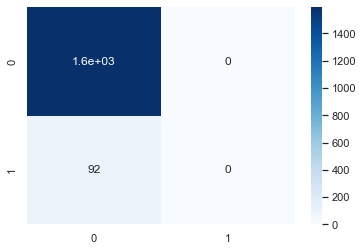

In [48]:
cfm = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cfm,annot=True,cmap='Blues')

###### Classification Report

In [50]:
from sklearn.metrics import classification_report

In [52]:
y_test_ped = model.predict(X_test)

In [53]:
target_names = ['Rejected','Accepted'] ##LOOK AT THIS DOES NOT MAKE SENSE!!

In [56]:
cReport = classification_report(y_test,y_test_pred,target_names =target_names)
print(cReport)

              precision    recall  f1-score   support

    Rejected       0.95      1.00      0.97      1595
    Accepted       0.00      0.00      0.00        92

    accuracy                           0.95      1687
   macro avg       0.47      0.50      0.49      1687
weighted avg       0.89      0.95      0.92      1687



C:\ProgramData\Anaconda3.0\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3.0\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3.0\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
